# Complexity (State Space)

This notebook covers Complexity measures that work in state space, including:
- Lyapunov Exponent

In [4]:
from neurodsp.sim import sim_powerlaw, sim_synaptic_current, sim_combined
from neurodsp.utils import set_random_seed

In [5]:
# Import custom code
import sys; from pathlib import Path
sys.path.append(str(Path('..').resolve()))

from apm.io import APMDB
from apm.run import run_sims, run_sims_load
from apm.methods import lyapunov
from apm.methods.settings import LY_PARAMS
from apm.plts.sims import plot_sims, plot_ap_sims, plot_pe_sims, plot_sims_two
from apm.plts.settings import EXT, COLORS
from apm.sim.examples import get_examples
from apm.sim.defs import N_SIMS2 as N_SIMS
from apm.sim.defs import SIM_ITERS

In [6]:
import seaborn as sns
sns.set_context('talk')

## Settings

In [7]:
# Set the random seed
set_random_seed(111)

In [8]:
# Settings for saving figures
SAVE_FIG = False
FIGPATH = APMDB().figs_path / '24_complexity'

In [9]:
# Settings for loading simulations
SIMPATH = APMDB().sims_path / 'time_series'

In [10]:
# Define collection of example signals
EXAMPLES = get_examples()

## Lyapunov Exponent

Words, words, words.

In [11]:
# Check the calculated Lyapunov exponent values across some example signals
print('Computed Lyapunov exponent:')
print('  powerlaw: \t {:1.4f}'.format(lyapunov(EXAMPLES['AP'])))
print('  osc:      \t {:1.4f}'.format(lyapunov(EXAMPLES['OSC'])))
print('  combined: \t {:1.4f}'.format(lyapunov(EXAMPLES['COMB'])))
print('  combined: \t {:1.4f}'.format(lyapunov(EXAMPLES['BURST'])))
print('  knee:     \t {:1.4f}'.format(lyapunov(EXAMPLES['KNEE'])))

Computed Lyapunov exponent:
  powerlaw: 	 0.0976
  osc:      	 0.0000
  combined: 	 0.1001
  combined: 	 0.0985
  knee:     	 0.0853


### Aperiodic Variations

In [13]:
# Run simulations calculating Lyapunov exponent across exponents
ly_sims_exp = run_sims(sim_powerlaw, SIM_ITERS['ap_exp'], lyapunov, LY_PARAMS, N_SIMS)

In [14]:
# Run simulations calculating Lyapunov exponent across exponents with an oscillation
ly_sims_comb = run_sims(sim_combined, SIM_ITERS['comb_exp'], lyapunov, LY_PARAMS, N_SIMS)

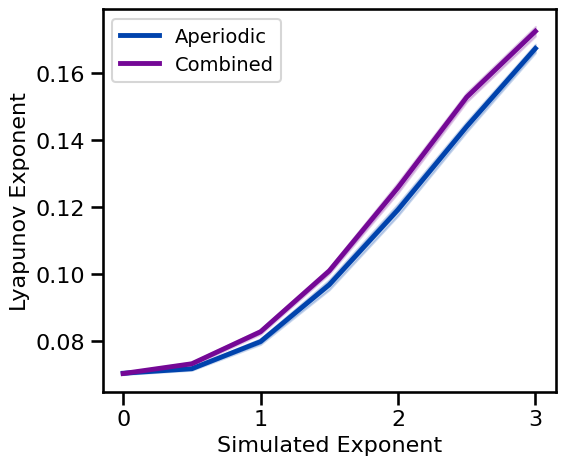

In [15]:
# Plot Lyapunov exponent estimates across aperiodic variations
plot_ap_sims(ly_sims_exp, ly_sims_comb, 'Lyapunov Exponent', 
             save_fig=SAVE_FIG, file_name='ly_ap' + EXT, file_path=FIGPATH)

### Periodic Variations

In [16]:
# Run simulations calculating Lyapunov exponent across oscillation frequency
ly_sims_freq = run_sims(sim_combined, SIM_ITERS['osc_freq'], lyapunov, LY_PARAMS, N_SIMS)

In [17]:
# Run simulations calculating Lyapunov exponent across oscillation power
ly_sims_pow = run_sims(sim_combined, SIM_ITERS['osc_pow'], lyapunov, LY_PARAMS, N_SIMS)

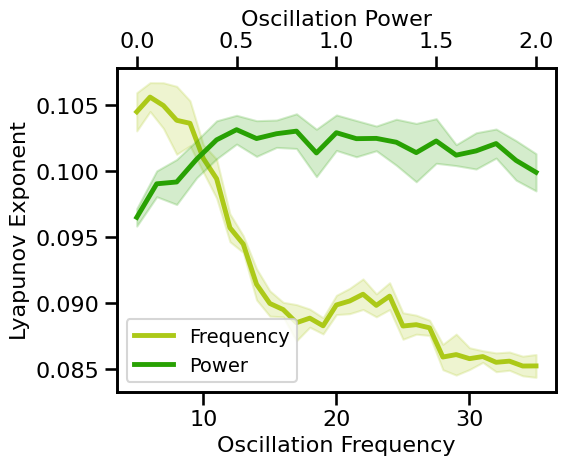

In [18]:
# Plot Lyapunov exponent estimates across periodic variations
plot_pe_sims(ly_sims_freq, ly_sims_pow, 'Lyapunov Exponent', 
             save_fig=SAVE_FIG, file_name='ly_pe' + EXT, file_path=FIGPATH)

### Knee Variations

In [19]:
# Run simulations calculating Lyapunov exponent across different timescales
ly_sims_tscales = run_sims(sim_synaptic_current, SIM_ITERS['syn_tscales'], lyapunov, LY_PARAMS, N_SIMS)

In [20]:
# Run simulations calculating Lyapunov exponent across peak bandwidths (sims from file)
ly_sims_knee = run_sims_load(SIMPATH / 'ts_sims_ap_knee', lyapunov, LY_PARAMS, N_SIMS)

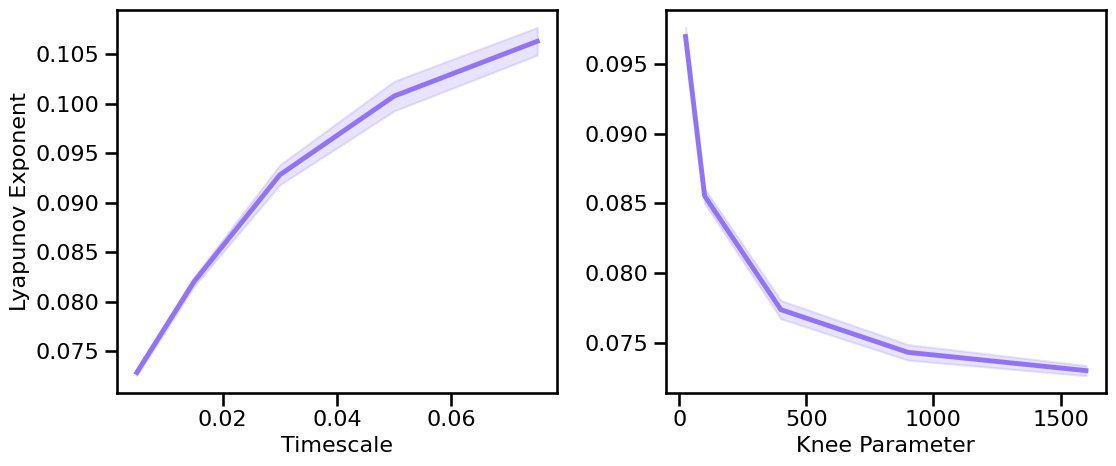

In [21]:
# Plot the estimated Lyapunov exponent across different timescales & knees
plot_sims_two(SIM_ITERS['syn_tscales'].values, ly_sims_tscales, 'Timescale',
              SIM_ITERS['kn_knee'].values, ly_sims_knee, 'Knee Parameter',
              ylabel='Lyapunov Exponent', color=COLORS['KN'], 
              save_fig=SAVE_FIG, file_name='cd_kn_vars' + EXT, file_path=FIGPATH)

### Peak Variations

In [22]:
# Run simulations calculating Lyapunov exponent across peak bandwidth (sims from file)
ly_sims_bw = run_sims_load(SIMPATH / 'ts_sims_comb_bw', lyapunov, LY_PARAMS, N_SIMS)

In [23]:
# Run simulations calculating Lyapunov exponent across burst probabilities
ly_sims_burst = run_sims(sim_combined, SIM_ITERS['comb_burst'], lyapunov, LY_PARAMS, N_SIMS)

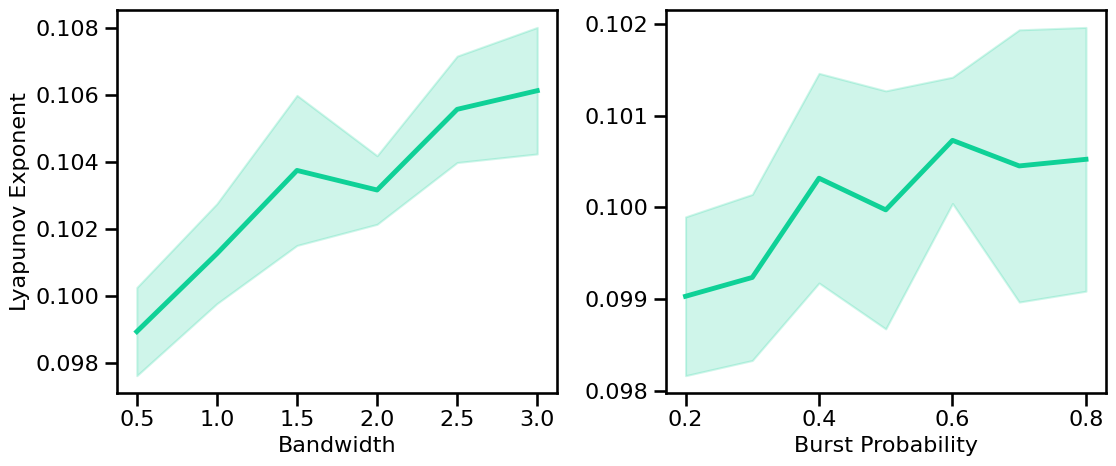

In [24]:
# Plot the estimated Lyapunov exponent across periodic variations
plot_sims_two(SIM_ITERS['peak_bw'].values, ly_sims_bw, 'Bandwidth',
              SIM_ITERS['comb_burst'].values, ly_sims_burst, 'Burst Probability',
              ylabel='Lyapunov Exponent', color=COLORS['BW'],
              save_fig=SAVE_FIG, file_name='cd_pe_vars' + EXT, file_path=FIGPATH)

## Conclusions

Lyapunov Exponent:
- decreases with decreasing aperiodic exponent, non-linearly
- increases to a point, then decreases, with increases oscillation frequency, non-linearly
- increases with increasing oscillation power, non-linearly